Методом простой итерации найти ширину функции на полувыстоте с точностью $\;10^{-3}$

$f(x) = x\cdot exp(-x^{2})$

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np 

In [16]:
def f(x):

    return x*math.e**(-x**2)

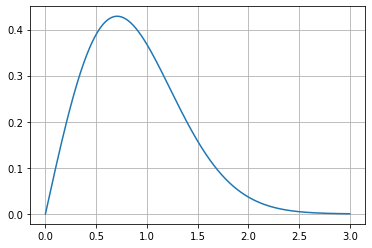

In [17]:
x_es = np.arange(0, 3, 0.0001)
y_es = f(x_es)

fig, ax = plt.subplots()
ax.plot(x_es, y_es)

ax.grid()

plt.show()

Производная нашей функции: $f'(x) = exp(-x^{2)} - 2x^2\cdot exp(-x^2) = 0 \to  $

$1 = 2x^2 \to x = \frac{1}{\sqrt{2}}$

Откуда высота: $f(\frac{1}{\sqrt{2}})$

In [19]:
H = f(1/math.sqrt(2))

0.42888194248035344


In [21]:
def new_f(x):
    return f(x) - H/2

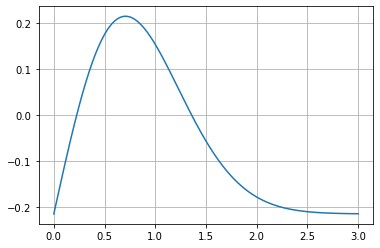

In [24]:
new_y_es = new_f(x_es)

fig, ax = plt.subplots()
ax.plot(x_es, new_y_es)

ax.grid()

plt.show()




Определим метод простых итераций для каждого из отрезков: [0, 0.5] (1), [1, 1.5] (2)

$\frac{H}{2}= x\cdot exp(-x^{2}) \to x_{n+1} = \frac{H}{2} \cdot exp(x_n^2) \to \phi_1'(x) = 2x\frac{H}{2}\cdot exp(x^{2}) \hspace{1in} (1)$

$\frac{H}{2}= x\cdot exp(-x^{2}) \to x_{n+1} =\sqrt{ln(x) - ln(\frac{H}{2})} \to \phi_2'(x) = \frac{1}{\sqrt{ln(x) - ln(\frac{H}{2})}} \cdot \frac{1}{x} \hspace{0.6321in} (2)$

Очевидно, что обе функции либо возрастают либо убывают на соответствующих отрезках, следовательно оценим модуль каждой из них по крайним точкам интервалов

In [39]:
def modfi_1(x):
    return abs(2*x*(H/2)*math.e**(x**2))

def modfi_2(x):
    return abs((1/math.sqrt(math.log(x) - math.log(H/2))) * (1/x))



def method_1(x):
    return (H/2)*math.e**(x**2)

def method_2(x):
    return math.sqrt(math.log(x) - math.log(H/2))

In [27]:
modfi_1_left = modfi_1(0)
modfi_1_right = modfi_1(0.5)

modfi_2_left = modfi_2(1)
modfi_2_right = modfi_2(1.5)

print(modfi_1_left, modfi_1_right)
print(modfi_2_left, modfi_2_right)

0.0 0.2753476574515919
0.8058960289190997 0.478000319466233


Можем убедится что каждый метод простой итерации подходит для выбранных отрезков, следовательно:

In [41]:
prpr_x = 0
x1 = math.sqrt(1/2)
pr_x = x1
#Поиск х на первом отрезке
while pr_x != prpr_x:
    prpr_x = pr_x
    x1 = method_1(x1)
    pr_x = math.floor(x1*10**3)
print(x1)

0.22566098369485846


In [42]:
prpr_x = 0
x2 = math.sqrt(1/2)
pr_x = x2
#Поиск х на первом отрезке
while pr_x != prpr_x:
    prpr_x = pr_x
    x2 = method_2(x2)
    pr_x = math.floor(x2*10**3)
print(x2)

1.3586650776957503


Тогда полуширина будет:

In [43]:
print(x2 - x1)

1.1330040940008919
